In [286]:
import pandas as pd
import datetime
import warnings
import copy
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns
import http.client 
import requests

In [287]:
request_url = "https://api.gateway.attomdata.com/v4/transaction/salestrend?geoIdV4=6828b00047035292dd47fe020e636bb3&interval=yearly&startyear=2003&endyear=2022"

In [288]:
conn = http.client.HTTPSConnection("api.gateway.attomdata.com") 

headers = { 
    'accept': "application/json", 
    'apikey': "8acc04a06164433b58ed0d8b1ed0c08b", 
} 

params = {
    "geoIdV4": "6828b00047035292dd47fe020e636bb3",
    "startyear": "2003",
    "endyear":"2022"	
}

housing_req = requests.get(request_url, params = params, headers = headers)

housing_req.raise_for_status

<bound method Response.raise_for_status of <Response [200]>>

In [289]:
housing_req = housing_req.json()
#housing_req= pd.DataFrame.f(housing_req)
#housing_req
housing_req

{'status': {'version': '4',
  'code': 0,
  'msg': 'SuccessWithResult',
  'total': 19,
  'page': 1,
  'pageSize': 100,
  'transactionID': '8b43bc507e6559408e938016738d8f89'},
 'salesTrends': [{'location': {'geoIdV4': '6828b00047035292dd47fe020e636bb3',
    'geographyName': '48317'},
   'dateRange': {'interval': 'yearly', 'start': '2004', 'end': '2004'},
   'salesTrend': {'homeSaleCount': 525,
    'avgSalePrice': 169086,
    'medSalePrice': 153000},
   'vintage': {'pubDate': '2022-02-12'}},
  {'location': {'geoIdV4': '6828b00047035292dd47fe020e636bb3',
    'geographyName': '48317'},
   'dateRange': {'interval': 'yearly', 'start': '2005', 'end': '2005'},
   'salesTrend': {'homeSaleCount': 522,
    'avgSalePrice': 191839,
    'medSalePrice': 172000},
   'vintage': {'pubDate': '2022-02-12'}},
  {'location': {'geoIdV4': '6828b00047035292dd47fe020e636bb3',
    'geographyName': '48317'},
   'dateRange': {'interval': 'yearly', 'start': '2006', 'end': '2006'},
   'salesTrend': {'homeSaleCount': 

In [290]:
housing_req = housing_req["salesTrends"]

In [278]:
#housing_req= pd.DataFrame.f(housing_req)
#housing_req
housing_req = housing_req["salesTrends"]

housing_req = [
   housing_req[i] for i in range(len(housing_req).apply(lambda x: pd.DataFrame.from_dict(x)))]


AttributeError: 'int' object has no attribute 'apply'

In [208]:
data_dir = '/Users/kotohatogami/Documents/GitHub/STA141B_WQ24/sta141b-proj/clean_data/'
cali_crime = pd.read_csv(data_dir + 'cali_crime.csv')

In [209]:
cali_crime

,Unnamed: 0,city,population,violent crime,murder and nonnegligent manslaughter,rape,robbery,aggravated assault,property crime,burglary,larceny-theft,motor vehicle theft,arson,state,year
0,0,Adelanto,38380.0,344.0,0.0,11.0,37.0,296.0,359.0,71.0,193.0,95.0,NaN,California,2022
1,1,Agoura Hills,19397.0,32.0,0.0,5.0,4.0,23.0,255.0,69.0,163.0,23.0,NaN,California,2022
2,2,Alameda,74441.0,232.0,1.0,17.0,100.0,114.0,3200.0,297.0,2302.0,601.0,20.0,California,2022
3,3,Albany,19011.0,40.0,0.0,5.0,16.0,19.0,564.0,70.0,432.0,62.0,12.0,California,2022
4,4,Alhambra,79703.0,160.0,0.0,12.0,73.0,75.0,2044.0,251.0,1453.0,340.0,6.0,California,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8499,8499,Woodland,51383.0,281.0,2.0,22.0,42.0,215.0,1517.0,607.0,569.0,341.0,39.0,California,2003
8500,8500,Yorba Linda,61706.0,61.0,0.0,9.0,13.0,39.0,814.0,160.0,588.0,66.0,14.0,California,2003
8501,8501,Yuba City,47708.0,201.0,0.0,28.0,46.0,127.0,1969.0,358.0,1409.0,202.0,14.0,California,2003
8502,8502,Yucaipa,44290.0,54.0,3.0,5.0,10.0,36.0,1027.0,198.0,687.0,142.0,4.0,California,2003


In [210]:
#columns = ['population', 'violent crime', 'murder and nonnegligent manslaughter', 
#          'rape', 'robbery', 'aggravated assault', 'property crime', 
#         'burglary', 'larceny-theft', 'motor vehicle theft', 'arson', 'year']

#cali_crime[columns] = cali_crime[columns].apply(pd.to_numeric, errors='coerce').astype('Int64')
#cali_crime[columns] = cali_crime[columns].apply(pd.to_numeric, errors='coerce')
cali_crime.drop(columns=['Unnamed: 0'], inplace=True)

In [213]:
sf_data

,city,population,violent crime,murder and nonnegligent manslaughter,rape,robbery,aggravated assault,property crime,burglary,larceny-theft,motor vehicle theft,arson,state,year,property_crime_rate,violent_crime_rate
0,San Francisco,764693.0,5323.0,55.0,308.0,2371.0,2589.0,47759.0,5947.0,35530.0,6282.0,344.0,California,2022,0.062455,0.006961
1,San Francisco,881514.0,4796.0,48.0,198.0,2388.0,2162.0,38737.0,7452.0,25319.0,5966.0,377.0,California,2020,0.043944,0.005441
2,San Francisco,886007.0,5933.0,40.0,324.0,3055.0,2514.0,48780.0,4644.0,39887.0,4249.0,275.0,California,2019,0.055056,0.006696
3,San Francisco,889282.0,6144.0,46.0,354.0,3165.0,2579.0,49214.0,5322.0,39675.0,4217.0,288.0,California,2018,0.055341,0.006909
4,San Francisco,881255.0,6301.0,56.0,367.0,3220.0,2658.0,54356.0,4935.0,44587.0,4834.0,303.0,California,2017,0.061680,0.007150
5,San Francisco,871155.0,6190.0,57.0,342.0,3175.0,2616.0,47402.0,4978.0,36991.0,5433.0,255.0,California,2016,0.054413,0.007106
6,San Francisco,863782.0,6710.0,53.0,344.0,3610.0,2703.0,53019.0,5186.0,40918.0,6915.0,272.0,California,2015,0.061380,0.007768
7,San Francisco,850294.0,6761.0,45.0,355.0,3224.0,3137.0,45093.0,5237.0,33730.0,6126.0,241.0,California,2014,0.053032,0.007951
8,San Francisco,833863.0,7064.0,48.0,161.0,4202.0,2653.0,48324.0,5931.0,36527.0,5866.0,227.0,California,2013,0.057952,0.008471
9,San Francisco,820363.0,5777.0,69.0,108.0,3484.0,2116.0,38898.0,5317.0,28242.0,5339.0,207.0,California,2012,0.047416,0.007042


In [211]:
# Aggregating sf data
sf_data = cali_crime[cali_crime['city']=='San Francisco']
sf_yearly_data = sf_data.groupby('year')

# Calculate crime rates for San Francisco
sf_data['property_crime_rate'] = sf_data['property crime'] / sf_data['population']
sf_data['violent_crime_rate'] = sf_data['violent crime'] / sf_data['population']
sf_data['total_crime_rate'] = (sf_data['property crime'] + sf_data['violent crime'] 
                               + sf_data['Unnamed: 0'])/ sf_data['population']

#columns = ['Unnamed: 0','violent crime', 'murder and nonnegligent manslaughter', 
           #'rape', 'robbery', 'aggravated assault', 'property crime', 
           #'burglary', 'larceny-theft', 'motor vehicle theft', 'arson']
#sf_data.drop(columns=columns, inplace=True)
# Group data by year


/var/folders/cd/csrhrbqn14vgstkk3y30fx300000gn/T/ipykernel_7990/995468154.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_data['property_crime_rate'] = sf_data['property crime'] / sf_data['population']
/var/folders/cd/csrhrbqn14vgstkk3y30fx300000gn/T/ipykernel_7990/995468154.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf_data['violent_crime_rate'] = sf_data['violent crime'] / sf_data['population']


KeyError: 'Unnamed: 0'

In [144]:
cali_crime = cali_crime.groupby('year')

for group_name, group_data in cali_crime:
    print(f"Year: {group_name}")
    print(group_data)

Year: 2003
      Unnamed: 0          city  population  violent crime  \
8156        8156      Adelanto     19067.0           87.0   
8157        8157  Agoura Hills     21932.0           60.0   
8158        8158       Alameda     73692.0          332.0   
8159        8159        Albany     16802.0           67.0   
8160        8160      Alhambra     88575.0          286.0   
...          ...           ...         ...            ...   
8499        8499      Woodland     51383.0          281.0   
8500        8500   Yorba Linda     61706.0           61.0   
8501        8501     Yuba City     47708.0          201.0   
8502        8502       Yucaipa     44290.0           54.0   
8503        8503  Yucca Valley     17946.0           67.0   

      murder and nonnegligent manslaughter  rape  robbery  aggravated assault  \
8156                                   1.0   4.0     29.0                53.0   
8157                                   0.0   4.0      9.0                47.0   
8158         

<Axes: >

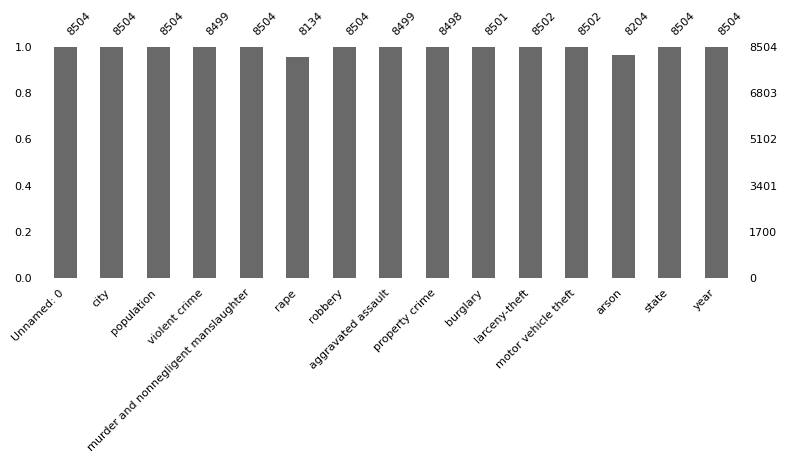

In [160]:
msno.bar(cali_crime, figsize=(9,3),fontsize=8)

In [190]:
cali_crime['population']

0       38380
1       19397
2       74441
3       19011
4       79703
        ...  
8499    51383
8500    61706
8501    47708
8502    44290
8503    17946
Name: population, Length: 8504, dtype: Int64

In [196]:
cali_crime['population'].sum()

592143716

In [197]:
ca_property_crime = cali_crime['property crime'].sum()

In [198]:
ca_pop = cali_crime['population'].sum()

In [199]:
ca_property_crime / ca_pop


0.028026496864825296

In [201]:
ca_violent_crime = cali_crime['violent crime'].sum()

In [202]:
ca_property_crime_rate = ca_property_crime / ca_pop
ca_violent_crime_rate = ca_violent_crime / ca_pop
ca_total_crime_rate = (ca_property_crime + ca_violent_crime) / ca_pop

In [204]:
# Group state average data by year
cali_yearly_data = cali_crime.groupby('year')

In [205]:
cali_yearly_data['year']

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (20, 2) + inhomogeneous part.

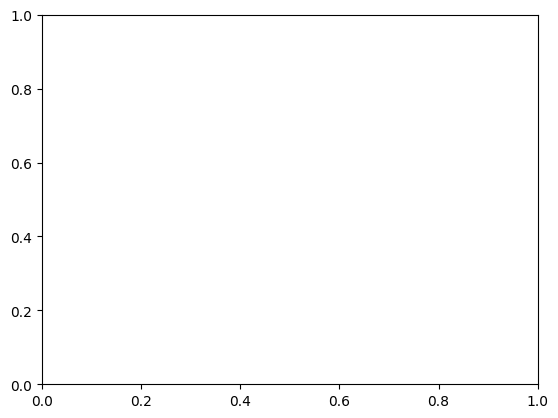

In [206]:
# Property Crime
plt.plot(cali_yearly_data['year'], ca_property_crime_rate)
#plt.plot(cali_yearly_data['year'], cali_yearly_data['property_crime_rate'])
plt.title('Property Crime Rate')
plt.legend()

In [97]:
sf_yearly_data

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (19, 2) + inhomogeneous part.

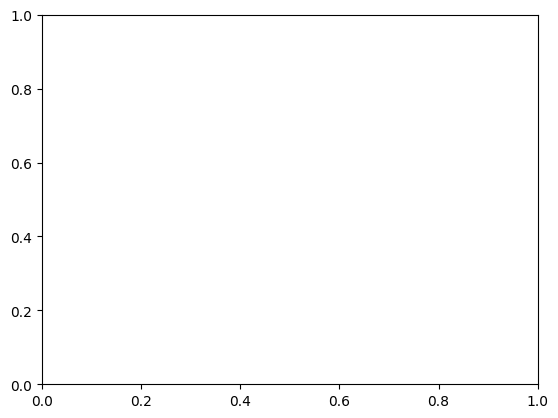

In [153]:
# Property Crime
plt.plot(sf_yearly_data['year'], sf_yearly_data['property_crime_rate'])
plt.plot(sf_yearly_data['year'], sf_yearly_data['property_crime_rate'])
plt.title('Property Crime Rate')
plt.legend()

AttributeError: 'function' object has no attribute 'index'

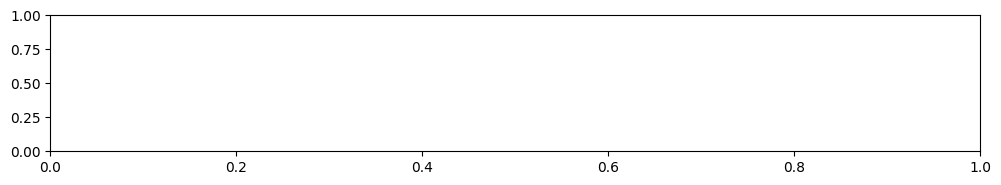

In [87]:
# Plotting
plt.figure(figsize=(12, 6))

# Property Crime
plt.subplot(3, 1, 1)
plt.plot(sf_yearly_data.index, sf_yearly_data['property_crime_rate'], label='San Francisco')
plt.plot(sf_yearly_data.index, sf_yearly_data['property_crime_rate'], label='State Average')
plt.title('Property Crime Rate')
plt.legend()

# Violent Crime
plt.subplot(3, 1, 2)
plt.plot(sf_yearly_data.index, sf_yearly_data['violent_crime_rate'], label='San Francisco')
plt.plot(cali_yearly_data.index, cali_yearly_data['violent_crime_rate'], label='State Average')
plt.title('Violent Crime Rate')
plt.legend()

# Total Crime
plt.subplot(3, 1, 3)
plt.plot(sf_yearly_data.index, sf_yearly_data['total_crime_rate'], label='San Francisco')
plt.plot(cali_yearly_data.index, cali_yearly_data['total_crime_rate'], label='State Average')
plt.title('Total Crime Rate')
plt.legend()

plt.tight_layout()
plt.show()